In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import pandas as pd
import numpy as onp
import scipy.stats as scistats

In [3]:
df = sm.datasets.get_rdataset('Nile').data

/Users/benhammel/Documents/projects/bayesian-stats-classes/venv/lib/python3.6/site-packages/statsmodels/datasets/utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


In [4]:
df.head()

,time,value
0,1871,1120
1,1872,1160
2,1873,963
3,1874,1210
4,1875,1160


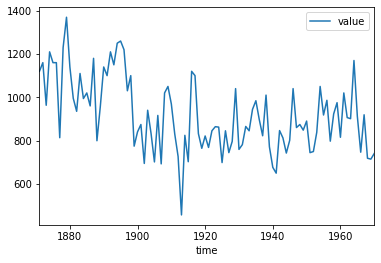

In [5]:
df.plot(x='time', y='value')

In [11]:
df = sm.datasets.get_rdataset('Potomac', 'extRemes').data

ValueError: Dataset Potomac was not found.